## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import pandera as pa
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
%matplotlib inline
from sklearn.svm import LinearSVC
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

## Display CSV File

In [2]:
Df = pd.read_csv('New_Approach_final_cancer_non_cancer.csv')

In [3]:
Df

,Gene_Symbol,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
0,TP53,10002.0,366.794571,37.989610,0.035019,2.253298,9.156820e-03,0.443794,0.030984,905.0,5.0,133.585586,905.0,0.0,128.0,0.843338,0.0,116753882.0,0.010396,1
1,TTN,858.0,15.953980,1.675527,0.783034,2.609444,1.000000e-04,0.383223,0.113208,55.0,5.0,379.740741,55.0,0.0,1.0,0.798820,0.0,1697192.0,0.050232,1
2,FAT1,35224.0,597.451799,61.898450,0.020228,2.757586,1.050000e-04,0.362636,0.016260,43.0,5.0,187.571429,43.0,0.0,1.0,0.780302,0.0,1245764.0,0.035307,1
3,MUC16,118.0,1.434836,0.149652,0.937928,2.731256,3.960000e-06,0.366132,0.127273,11.0,5.0,807.909091,11.0,0.0,0.0,0.783593,0.0,295908.0,0.135844,1
4,CDKN2A,235.0,9.304762,0.965542,0.031740,2.493129,6.570000e-04,0.401102,0.079445,192.0,5.0,224.457831,191.0,0.0,24.0,0.813359,1.0,8522862.0,0.024084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PSMD7,25321.0,721.648233,74.735184,0.148959,2.521328,1.160000e-04,0.396616,0.119732,109.0,5.0,335.224299,108.0,0.0,0.0,0.809834,1.0,2742700.0,0.037247,0
1996,RGS2,15709.0,570.100364,59.145224,0.112480,2.958333,1.910000e-05,0.338028,0.042857,22.0,6.0,145.714286,22.0,0.0,1.0,0.755208,0.0,197488.0,0.057998,0
1997,IL13,6.0,0.234009,0.024229,0.301837,3.659136,2.700000e-07,0.273289,0.000000,3.0,6.0,47.666667,3.0,0.0,0.0,0.667608,0.0,1708.0,0.335731,0
1998,FAP,15318.0,483.076972,50.031859,0.398518,2.957564,1.020000e-05,0.338116,0.116667,20.0,5.0,222.250000,20.0,0.0,4.0,0.755305,0.0,99558.0,0.086719,0


## Define Shape

In [4]:
Df.shape

(2000, 20)

## Check Data Validation

In [5]:
Df.isnull().sum()

Gene_Symbol                       0
raw_counts                       61
median_length_normalized         61
RPKM                             61
Methylation..Beta.values.       159
AverageShortestPathLength       117
BetweennessCentrality           117
ClosenessCentrality             117
ClusteringCoefficient           117
Degree                          117
Eccentricity                    117
NeighborhoodConnectivity        117
NumberOfDirectedEdges           117
NumberOfUndirectedEdges         117
PartnerOfMultiEdgedNodePairs    117
Radiality                       117
SelfLoops                       117
Stress                          117
TopologicalCoefficient          117
label                             0
dtype: int64

In [6]:
df = Df.dropna()
df

,Gene_Symbol,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
0,TP53,10002.0,366.794571,37.989610,0.035019,2.253298,9.156820e-03,0.443794,0.030984,905.0,5.0,133.585586,905.0,0.0,128.0,0.843338,0.0,116753882.0,0.010396,1
1,TTN,858.0,15.953980,1.675527,0.783034,2.609444,1.000000e-04,0.383223,0.113208,55.0,5.0,379.740741,55.0,0.0,1.0,0.798820,0.0,1697192.0,0.050232,1
2,FAT1,35224.0,597.451799,61.898450,0.020228,2.757586,1.050000e-04,0.362636,0.016260,43.0,5.0,187.571429,43.0,0.0,1.0,0.780302,0.0,1245764.0,0.035307,1
3,MUC16,118.0,1.434836,0.149652,0.937928,2.731256,3.960000e-06,0.366132,0.127273,11.0,5.0,807.909091,11.0,0.0,0.0,0.783593,0.0,295908.0,0.135844,1
4,CDKN2A,235.0,9.304762,0.965542,0.031740,2.493129,6.570000e-04,0.401102,0.079445,192.0,5.0,224.457831,191.0,0.0,24.0,0.813359,1.0,8522862.0,0.024084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PSMD7,25321.0,721.648233,74.735184,0.148959,2.521328,1.160000e-04,0.396616,0.119732,109.0,5.0,335.224299,108.0,0.0,0.0,0.809834,1.0,2742700.0,0.037247,0
1996,RGS2,15709.0,570.100364,59.145224,0.112480,2.958333,1.910000e-05,0.338028,0.042857,22.0,6.0,145.714286,22.0,0.0,1.0,0.755208,0.0,197488.0,0.057998,0
1997,IL13,6.0,0.234009,0.024229,0.301837,3.659136,2.700000e-07,0.273289,0.000000,3.0,6.0,47.666667,3.0,0.0,0.0,0.667608,0.0,1708.0,0.335731,0
1998,FAP,15318.0,483.076972,50.031859,0.398518,2.957564,1.020000e-05,0.338116,0.116667,20.0,5.0,222.250000,20.0,0.0,4.0,0.755305,0.0,99558.0,0.086719,0


## Clean Data 

In [7]:
df.isna().sum()

Gene_Symbol                     0
raw_counts                      0
median_length_normalized        0
RPKM                            0
Methylation..Beta.values.       0
AverageShortestPathLength       0
BetweennessCentrality           0
ClosenessCentrality             0
ClusteringCoefficient           0
Degree                          0
Eccentricity                    0
NeighborhoodConnectivity        0
NumberOfDirectedEdges           0
NumberOfUndirectedEdges         0
PartnerOfMultiEdgedNodePairs    0
Radiality                       0
SelfLoops                       0
Stress                          0
TopologicalCoefficient          0
label                           0
dtype: int64

## Copy Data

In [8]:
df.copy()

,Gene_Symbol,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
0,TP53,10002.0,366.794571,37.989610,0.035019,2.253298,9.156820e-03,0.443794,0.030984,905.0,5.0,133.585586,905.0,0.0,128.0,0.843338,0.0,116753882.0,0.010396,1
1,TTN,858.0,15.953980,1.675527,0.783034,2.609444,1.000000e-04,0.383223,0.113208,55.0,5.0,379.740741,55.0,0.0,1.0,0.798820,0.0,1697192.0,0.050232,1
2,FAT1,35224.0,597.451799,61.898450,0.020228,2.757586,1.050000e-04,0.362636,0.016260,43.0,5.0,187.571429,43.0,0.0,1.0,0.780302,0.0,1245764.0,0.035307,1
3,MUC16,118.0,1.434836,0.149652,0.937928,2.731256,3.960000e-06,0.366132,0.127273,11.0,5.0,807.909091,11.0,0.0,0.0,0.783593,0.0,295908.0,0.135844,1
4,CDKN2A,235.0,9.304762,0.965542,0.031740,2.493129,6.570000e-04,0.401102,0.079445,192.0,5.0,224.457831,191.0,0.0,24.0,0.813359,1.0,8522862.0,0.024084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,PSMD7,25321.0,721.648233,74.735184,0.148959,2.521328,1.160000e-04,0.396616,0.119732,109.0,5.0,335.224299,108.0,0.0,0.0,0.809834,1.0,2742700.0,0.037247,0
1996,RGS2,15709.0,570.100364,59.145224,0.112480,2.958333,1.910000e-05,0.338028,0.042857,22.0,6.0,145.714286,22.0,0.0,1.0,0.755208,0.0,197488.0,0.057998,0
1997,IL13,6.0,0.234009,0.024229,0.301837,3.659136,2.700000e-07,0.273289,0.000000,3.0,6.0,47.666667,3.0,0.0,0.0,0.667608,0.0,1708.0,0.335731,0
1998,FAP,15318.0,483.076972,50.031859,0.398518,2.957564,1.020000e-05,0.338116,0.116667,20.0,5.0,222.250000,20.0,0.0,4.0,0.755305,0.0,99558.0,0.086719,0


In [9]:
df.describe()

,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
count,1.797000e+03,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1.797000e+03,1797.000000,1797.000000
mean,1.612154e+04,455.418525,47.201989,0.371424,2.874169,0.000325,0.353696,0.089450,75.180301,5.413467,307.192235,75.027268,0.0,3.974402,0.766598,0.153033,4.485454e+06,0.099510,0.443517
std,6.811551e+04,2451.748882,254.132796,0.311708,0.384009,0.002316,0.045231,0.112935,149.398176,0.564244,312.234869,149.312548,0.0,8.911868,0.045596,0.360119,2.973748e+07,0.123449,0.496938
min,0.000000e+00,0.000000,0.000000,0.008501,1.000000,0.000000,0.195833,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.517659,0.000000,0.000000e+00,0.000000,0.000000
25%,1.990000e+02,2.582599,0.269417,0.060459,2.599274,0.000002,0.326138,0.025468,8.000000,5.000000,141.194444,8.000000,0.0,0.000000,0.742263,0.000000,3.748400e+04,0.027794,0.000000
50%,1.937000e+03,24.338631,2.525619,0.334368,2.810961,0.000030,0.355750,0.064168,29.000000,5.000000,223.304598,29.000000,0.0,1.000000,0.773630,0.000000,4.614360e+05,0.049519,0.000000
75%,7.124000e+03,117.426787,12.160075,0.627820,3.066183,0.000139,0.384723,0.115101,82.000000,6.000000,364.783784,82.000000,0.0,4.000000,0.800091,0.000000,2.114042e+06,0.112309,1.000000
max,1.105011e+06,55925.167170,5795.932113,0.986522,5.106390,0.073595,1.000000,1.000000,2895.000000,8.000000,2880.000000,2894.000000,0.0,128.000000,1.000000,1.000000,1.002660e+09,0.677419,1.000000


In [10]:
df.head(10)

,Gene_Symbol,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
0,TP53,10002.0,366.794571,37.989610,0.035019,2.253298,0.009157,0.443794,0.030984,905.0,5.0,133.585586,905.0,0.0,128.0,0.843338,0.0,116753882.0,0.010396,1
1,TTN,858.0,15.953980,1.675527,0.783034,2.609444,0.000100,0.383223,0.113208,55.0,5.0,379.740741,55.0,0.0,1.0,0.798820,0.0,1697192.0,0.050232,1
2,FAT1,35224.0,597.451799,61.898450,0.020228,2.757586,0.000105,0.362636,0.016260,43.0,5.0,187.571429,43.0,0.0,1.0,0.780302,0.0,1245764.0,0.035307,1
3,MUC16,118.0,1.434836,0.149652,0.937928,2.731256,0.000004,0.366132,0.127273,11.0,5.0,807.909091,11.0,0.0,0.0,0.783593,0.0,295908.0,0.135844,1
4,CDKN2A,235.0,9.304762,0.965542,0.031740,2.493129,0.000657,0.401102,0.079445,192.0,5.0,224.457831,191.0,0.0,24.0,0.813359,1.0,8522862.0,0.024084,1
5,CSMD3,83.0,0.353585,0.039856,0.720496,3.689699,0.000000,0.271025,0.000000,1.0,6.0,71.000000,1.0,0.0,0.0,0.663788,0.0,0.0,0.000000,1
6,SYNE1,969.0,12.146521,1.273861,0.045060,2.731860,0.000018,0.366051,0.141538,26.0,6.0,524.961538,26.0,0.0,0.0,0.783517,0.0,399472.0,0.089058,1
7,LRP1B,14.0,0.059787,0.007283,0.450708,2.856915,0.000042,0.350028,0.014493,24.0,5.0,201.875000,24.0,0.0,0.0,0.767886,0.0,409302.0,0.051347,1
8,NOTCH1,1629.0,12.466841,1.294634,0.847826,2.475044,0.000800,0.404033,0.036480,209.0,5.0,162.478947,209.0,0.0,19.0,0.815620,0.0,10106162.0,0.016783,1
9,PCLO,47.0,0.509059,0.053760,0.401739,2.733344,0.000017,0.365852,0.128205,13.0,5.0,754.538462,13.0,0.0,0.0,0.783332,0.0,513958.0,0.127749,1


In [11]:
df.tail()

,Gene_Symbol,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
1995,PSMD7,25321.0,721.648233,74.735184,0.148959,2.521328,1.160000e-04,0.396616,0.119732,109.0,5.0,335.224299,108.0,0.0,0.0,0.809834,1.0,2742700.0,0.037247,0
1996,RGS2,15709.0,570.100364,59.145224,0.112480,2.958333,1.910000e-05,0.338028,0.042857,22.0,6.0,145.714286,22.0,0.0,1.0,0.755208,0.0,197488.0,0.057998,0
1997,IL13,6.0,0.234009,0.024229,0.301837,3.659136,2.700000e-07,0.273289,0.000000,3.0,6.0,47.666667,3.0,0.0,0.0,0.667608,0.0,1708.0,0.335731,0
1998,FAP,15318.0,483.076972,50.031859,0.398518,2.957564,1.020000e-05,0.338116,0.116667,20.0,5.0,222.250000,20.0,0.0,4.0,0.755305,0.0,99558.0,0.086719,0
1999,WNT2,3042.0,52.908838,5.479568,0.794931,3.110048,2.640000e-06,0.321538,0.000000,8.0,6.0,108.625000,8.0,0.0,0.0,0.736244,0.0,24634.0,0.130931,0


In [12]:
df.drop('Gene_Symbol', axis=1, inplace=True)

In [13]:
df

,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient,label
0,10002.0,366.794571,37.989610,0.035019,2.253298,9.156820e-03,0.443794,0.030984,905.0,5.0,133.585586,905.0,0.0,128.0,0.843338,0.0,116753882.0,0.010396,1
1,858.0,15.953980,1.675527,0.783034,2.609444,1.000000e-04,0.383223,0.113208,55.0,5.0,379.740741,55.0,0.0,1.0,0.798820,0.0,1697192.0,0.050232,1
2,35224.0,597.451799,61.898450,0.020228,2.757586,1.050000e-04,0.362636,0.016260,43.0,5.0,187.571429,43.0,0.0,1.0,0.780302,0.0,1245764.0,0.035307,1
3,118.0,1.434836,0.149652,0.937928,2.731256,3.960000e-06,0.366132,0.127273,11.0,5.0,807.909091,11.0,0.0,0.0,0.783593,0.0,295908.0,0.135844,1
4,235.0,9.304762,0.965542,0.031740,2.493129,6.570000e-04,0.401102,0.079445,192.0,5.0,224.457831,191.0,0.0,24.0,0.813359,1.0,8522862.0,0.024084,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,25321.0,721.648233,74.735184,0.148959,2.521328,1.160000e-04,0.396616,0.119732,109.0,5.0,335.224299,108.0,0.0,0.0,0.809834,1.0,2742700.0,0.037247,0
1996,15709.0,570.100364,59.145224,0.112480,2.958333,1.910000e-05,0.338028,0.042857,22.0,6.0,145.714286,22.0,0.0,1.0,0.755208,0.0,197488.0,0.057998,0
1997,6.0,0.234009,0.024229,0.301837,3.659136,2.700000e-07,0.273289,0.000000,3.0,6.0,47.666667,3.0,0.0,0.0,0.667608,0.0,1708.0,0.335731,0
1998,15318.0,483.076972,50.031859,0.398518,2.957564,1.020000e-05,0.338116,0.116667,20.0,5.0,222.250000,20.0,0.0,4.0,0.755305,0.0,99558.0,0.086719,0


## EDA

<AxesSubplot:xlabel='Eccentricity', ylabel='Stress'>

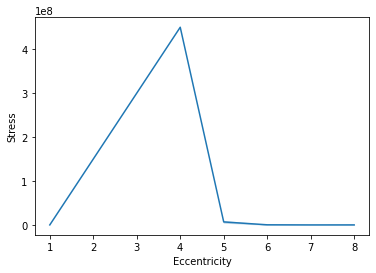

In [14]:
sns.lineplot(x = df['Eccentricity'], y = df['Stress'])

<AxesSubplot:xlabel='label', ylabel='Radiality'>

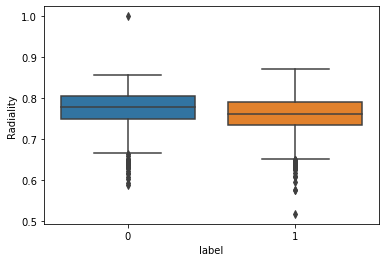

In [15]:
sns.boxplot(x = "label", y = "Radiality", data = df)

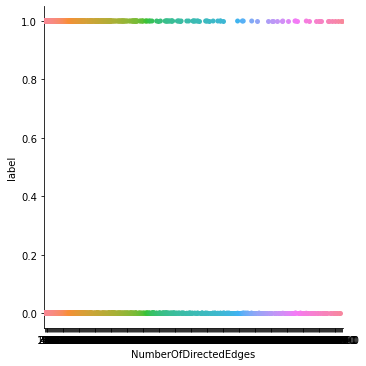

In [16]:
sns.catplot(x="NumberOfDirectedEdges", y="label", kind="swarm", data=df);

## Check co relation with heatmap

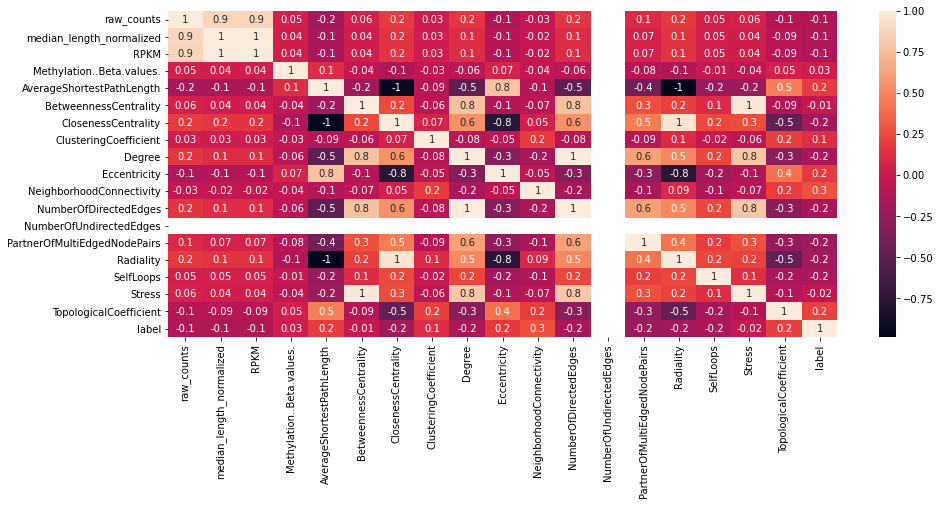

In [17]:
#sns.set_context('notebook')                           
plt.figure(figsize=(15,6))                            
cor = df.corr()
sns.heatmap(cor, annot=True, fmt='.1g');

## Create Dependent & Independent Variable

In [18]:
X = df.drop('label', axis=1)
X

,raw_counts,median_length_normalized,RPKM,Methylation..Beta.values.,AverageShortestPathLength,BetweennessCentrality,ClosenessCentrality,ClusteringCoefficient,Degree,Eccentricity,NeighborhoodConnectivity,NumberOfDirectedEdges,NumberOfUndirectedEdges,PartnerOfMultiEdgedNodePairs,Radiality,SelfLoops,Stress,TopologicalCoefficient
0,10002.0,366.794571,37.989610,0.035019,2.253298,9.156820e-03,0.443794,0.030984,905.0,5.0,133.585586,905.0,0.0,128.0,0.843338,0.0,116753882.0,0.010396
1,858.0,15.953980,1.675527,0.783034,2.609444,1.000000e-04,0.383223,0.113208,55.0,5.0,379.740741,55.0,0.0,1.0,0.798820,0.0,1697192.0,0.050232
2,35224.0,597.451799,61.898450,0.020228,2.757586,1.050000e-04,0.362636,0.016260,43.0,5.0,187.571429,43.0,0.0,1.0,0.780302,0.0,1245764.0,0.035307
3,118.0,1.434836,0.149652,0.937928,2.731256,3.960000e-06,0.366132,0.127273,11.0,5.0,807.909091,11.0,0.0,0.0,0.783593,0.0,295908.0,0.135844
4,235.0,9.304762,0.965542,0.031740,2.493129,6.570000e-04,0.401102,0.079445,192.0,5.0,224.457831,191.0,0.0,24.0,0.813359,1.0,8522862.0,0.024084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,25321.0,721.648233,74.735184,0.148959,2.521328,1.160000e-04,0.396616,0.119732,109.0,5.0,335.224299,108.0,0.0,0.0,0.809834,1.0,2742700.0,0.037247
1996,15709.0,570.100364,59.145224,0.112480,2.958333,1.910000e-05,0.338028,0.042857,22.0,6.0,145.714286,22.0,0.0,1.0,0.755208,0.0,197488.0,0.057998
1997,6.0,0.234009,0.024229,0.301837,3.659136,2.700000e-07,0.273289,0.000000,3.0,6.0,47.666667,3.0,0.0,0.0,0.667608,0.0,1708.0,0.335731
1998,15318.0,483.076972,50.031859,0.398518,2.957564,1.020000e-05,0.338116,0.116667,20.0,5.0,222.250000,20.0,0.0,4.0,0.755305,0.0,99558.0,0.086719


In [19]:
y=df['label']
y

0       1
1       1
2       1
3       1
4       1
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: label, Length: 1797, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

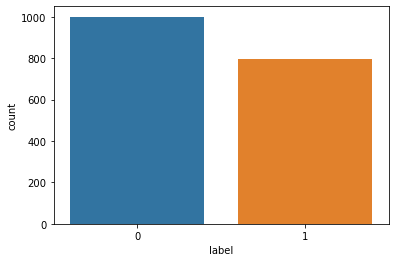

In [20]:
sns.countplot(x=df['label'])

## Train Model At Least 5 Algorithms

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1203, 18) (1203,)
(594, 18) (594,)


## Scale Data

In [22]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.2196078 , -0.17341338, -0.17337272, ...,  2.34578403,
        -0.08195211, -0.53487049],
       [-0.21132717, -0.16698219, -0.16692968, ..., -0.4262967 ,
        -0.12387852, -0.43441092],
       [16.68074744, 23.10666301, 23.09347301, ..., -0.4262967 ,
        -0.14188515, -0.44162875],
       ...,
       [-0.22868435, -0.17388366, -0.17384102, ..., -0.4262967 ,
        -0.14656097, -0.78904066],
       [-0.18089853, -0.15089072, -0.15086887, ..., -0.4262967 ,
        -0.14343019,  0.56185947],
       [-0.06686765, -0.07945513, -0.07951134, ..., -0.4262967 ,
        -0.05607813, -0.52191056]])

In [23]:
X_test = scaler.transform(X_test)
X_test

array([[-0.20254144, -0.16665751, -0.16662455, ..., -0.4262967 ,
        -0.1452807 , -0.18232614],
       [-0.19701591, -0.16746523, -0.16740822, ..., -0.4262967 ,
        -0.1454467 , -0.0851212 ],
       [-0.23264865, -0.17536628, -0.17532321, ..., -0.4262967 ,
        -0.14004267,  1.48488295],
       ...,
       [ 1.75912635,  0.49592189,  0.49512392, ..., -0.4262967 ,
        -0.14651557,  2.10674235],
       [-0.23269457, -0.17537525, -0.17533217, ..., -0.4262967 ,
        -0.14542638, -0.07684363],
       [-0.18662303, -0.15344649, -0.15333523, ..., -0.4262967 ,
        -0.11814639, -0.53989917]])

In [24]:
#Decision Tree Classifier.
dt_clf=DecisionTreeClassifier(random_state=25)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=25)

In [25]:
dt_pred = dt_clf.predict(X_test)

In [26]:
print(confusion_matrix(y_test,dt_pred))
print(classification_report(y_test,dt_pred))
Decision_Tree_Accuracy = round(accuracy_score(y_test, dt_pred)*100)
Decision_Tree_Accuracy

[[240  96]
 [ 84 174]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.73       336
           1       0.64      0.67      0.66       258

    accuracy                           0.70       594
   macro avg       0.69      0.69      0.69       594
weighted avg       0.70      0.70      0.70       594



70

AUC: 0.6943521594684384


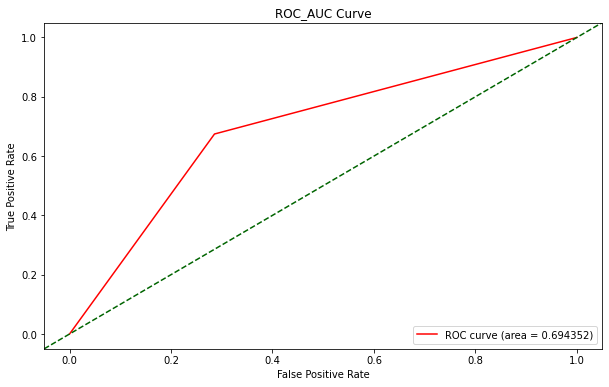

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
auc = roc_auc_score(y_test, dt_pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [28]:
#Logistic regression.
lr_model = LogisticRegression(random_state=25)

In [29]:
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=25)

In [30]:
pred = lr_model.predict(X_test)

In [31]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Logistic_regression_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Logistic_regression_Accuracy)

[[280  56]
 [118 140]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       336
           1       0.71      0.54      0.62       258

    accuracy                           0.71       594
   macro avg       0.71      0.69      0.69       594
weighted avg       0.71      0.71      0.70       594

71


AUC: 0.6879844961240311


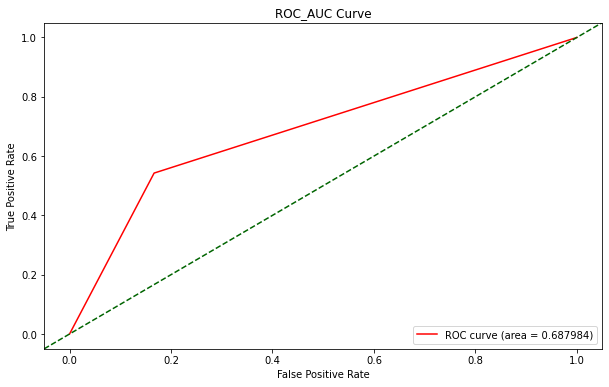

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knnr = KNeighborsClassifier() 
knnr.fit(X_train, y_train )
pred=knnr.predict(X_test)

In [34]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
KNN_Accuracy = round(accuracy_score(y_test, pred)*100)
print(KNN_Accuracy )

[[252  84]
 [ 98 160]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       336
           1       0.66      0.62      0.64       258

    accuracy                           0.69       594
   macro avg       0.69      0.69      0.69       594
weighted avg       0.69      0.69      0.69       594

69


AUC: 0.685077519379845


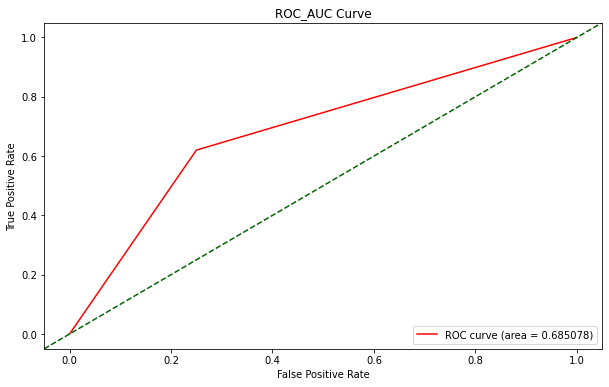

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [36]:
 clf = RandomForestClassifier(max_depth=2, random_state=0)

In [37]:
clf.fit(X_train, y_train)
RandomForestClassifier(...)
pred = clf.predict(X_test)
pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [38]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Random_Forest_Accuracy = round(accuracy_score(y_test, pred)*100)
print(Random_Forest_Accuracy)

[[247  89]
 [ 76 182]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       336
           1       0.67      0.71      0.69       258

    accuracy                           0.72       594
   macro avg       0.72      0.72      0.72       594
weighted avg       0.72      0.72      0.72       594

72


AUC: 0.7202727021040974


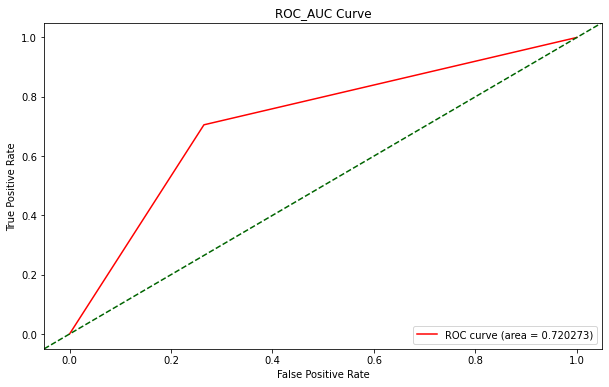

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

In [40]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred = gnb.predict(X_test)
pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [41]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
Naive_Bayes = round(accuracy_score(y_test, pred)*100)
print(Naive_Bayes)

[[200 136]
 [ 71 187]]
              precision    recall  f1-score   support

           0       0.74      0.60      0.66       336
           1       0.58      0.72      0.64       258

    accuracy                           0.65       594
   macro avg       0.66      0.66      0.65       594
weighted avg       0.67      0.65      0.65       594

65


AUC: 0.6600221483942413


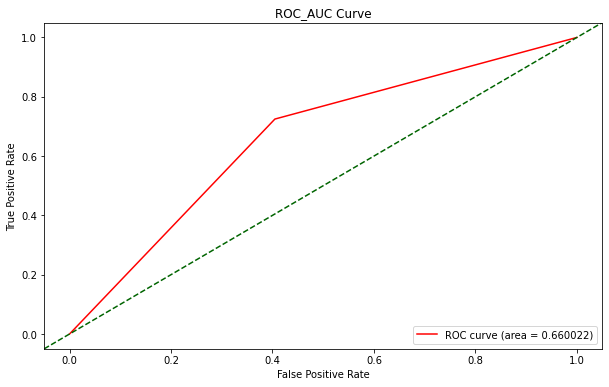

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
auc = roc_auc_score(y_test, pred)
print('AUC:', auc)

plt.figure(figsize = (10, 6))
plt.plot(fpr, tpr, color = 'red', label = 'ROC curve (area = %f)' % auc)
plt.plot([-0.05, 1.05], [-0.05, 1.05], linestyle = '--', color = 'darkgreen')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC_AUC Curve')
plt.legend(loc = "lower right")
plt.show()

## Create Dataframe and pass all the algorithms and then create bar chart

In [43]:
data = {'Decision Tree Classifier': [Decision_Tree_Accuracy],
        'Logistic Regression': [Logistic_regression_Accuracy],
        'KNN': [KNN_Accuracy],
        'Random Forest Classifier': [Random_Forest_Accuracy],
        'Naive_Bayes': [Naive_Bayes]
        }

df = pd.DataFrame(data)
df

,Decision Tree Classifier,Logistic Regression,KNN,Random Forest Classifier,Naive_Bayes
0,70,71,69,72,65


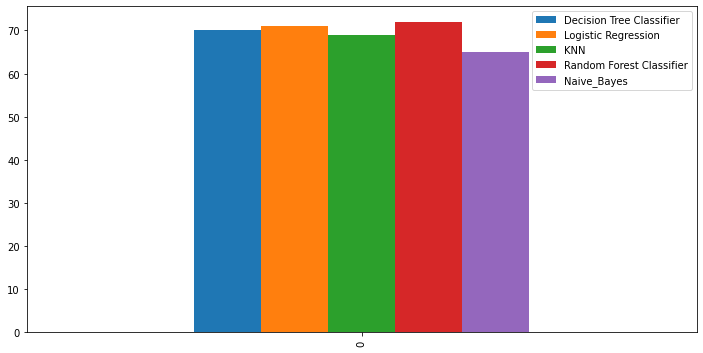

In [44]:
#Bar chart on the above dataframe.
df.plot.bar(figsize = (12, 6))
#plt.figure(figsize=(10, 8))
#plt.legend(x = ['Decision Tree Classifier', 'Logistic Regression', 'KNN', 'Random Forest Classifier'],loc=2)
#plt.legend(['Decision Tree Classifier', 'Logistic Regression', 'KNN','Random Forest Classifier'], loc = 'upper left')
plt.show()

In [45]:
dat = {'Models': ['Decision Tree Classifier', 'Logistic Regression',  'KNN', 'Random Forest Classifier', 'Naive_Bayes'], 'Accuracy of Models': [Decision_Tree_Accuracy, Logistic_regression_Accuracy, KNN_Accuracy, Random_Forest_Accuracy, Naive_Bayes]}
dt = pd.DataFrame(dat)
display(dt)

,Models,Accuracy of Models
0,Decision Tree Classifier,70
1,Logistic Regression,71
2,KNN,69
3,Random Forest Classifier,72
4,Naive_Bayes,65


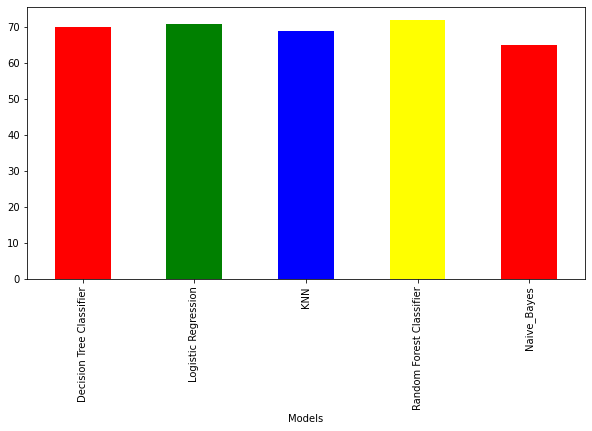

In [46]:
#Create barplot on the above dataframe.
dt.plot(x='Models', y='Accuracy of Models', kind='bar', color = ['red', 'green', 'blue', 'yellow'], figsize = (10, 5),legend=None)
#dt(plt.figure(figsize=(12,20)))
plt.show()